# Human Machine Agreement

In [50]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [51]:
human = pd.read_csv("/home/ada/humor/data/stand_up_dataset/human_ans - Sheet1.csv")
models = pd.read_csv("/home/ada/humor/data/stand_up_dataset/llm_ans - Sheet1.csv")

Cohen's Kappa

In [52]:
num_participants = 10
human['not_funny'] = num_participants - human['funny']
human['human'] = (human['funny'] >= human['not_funny']).astype(int)
merged_df = pd.merge(human[['comedian', 'sentence', 'human']], models, on=['comedian', 'sentence'])

model_names = ['gemma', 'gemma2', 'llama', 'phi', 'chatgpt', 'claude']  
results = []

for m in model_names:
    kappa = cohen_kappa_score(merged_df['human'], merged_df[m])
    results.append({'comedian': m, 'kappa': kappa}) 

results_df = pd.DataFrame(results)
average_kappa = results_df['kappa'].mean()
results_df.loc[len(results_df.index)] = ["Overall", average_kappa]
results_df

,comedian,kappa
0,gemma,-0.020309
1,gemma2,0.133845
2,llama,-0.040654
3,phi,-0.042601
4,chatgpt,0.046173
5,claude,0.246615
6,Overall,0.053845


Percentage Agreement Rates

In [53]:
agreement_rates = {}
for model in model_names:
    matches = (merged_df['human'] == merged_df[model])
    agreement_rate = matches.mean() * 100  
    agreement_rates[model] = agreement_rate

agreement_df = pd.DataFrame.from_dict(agreement_rates, orient='index', columns=['Agreement Rate'])

agreement_df


,Agreement Rate
gemma,69.426752
gemma2,70.700637
llama,61.783439
phi,66.242038
chatgpt,26.751592
claude,64.331210


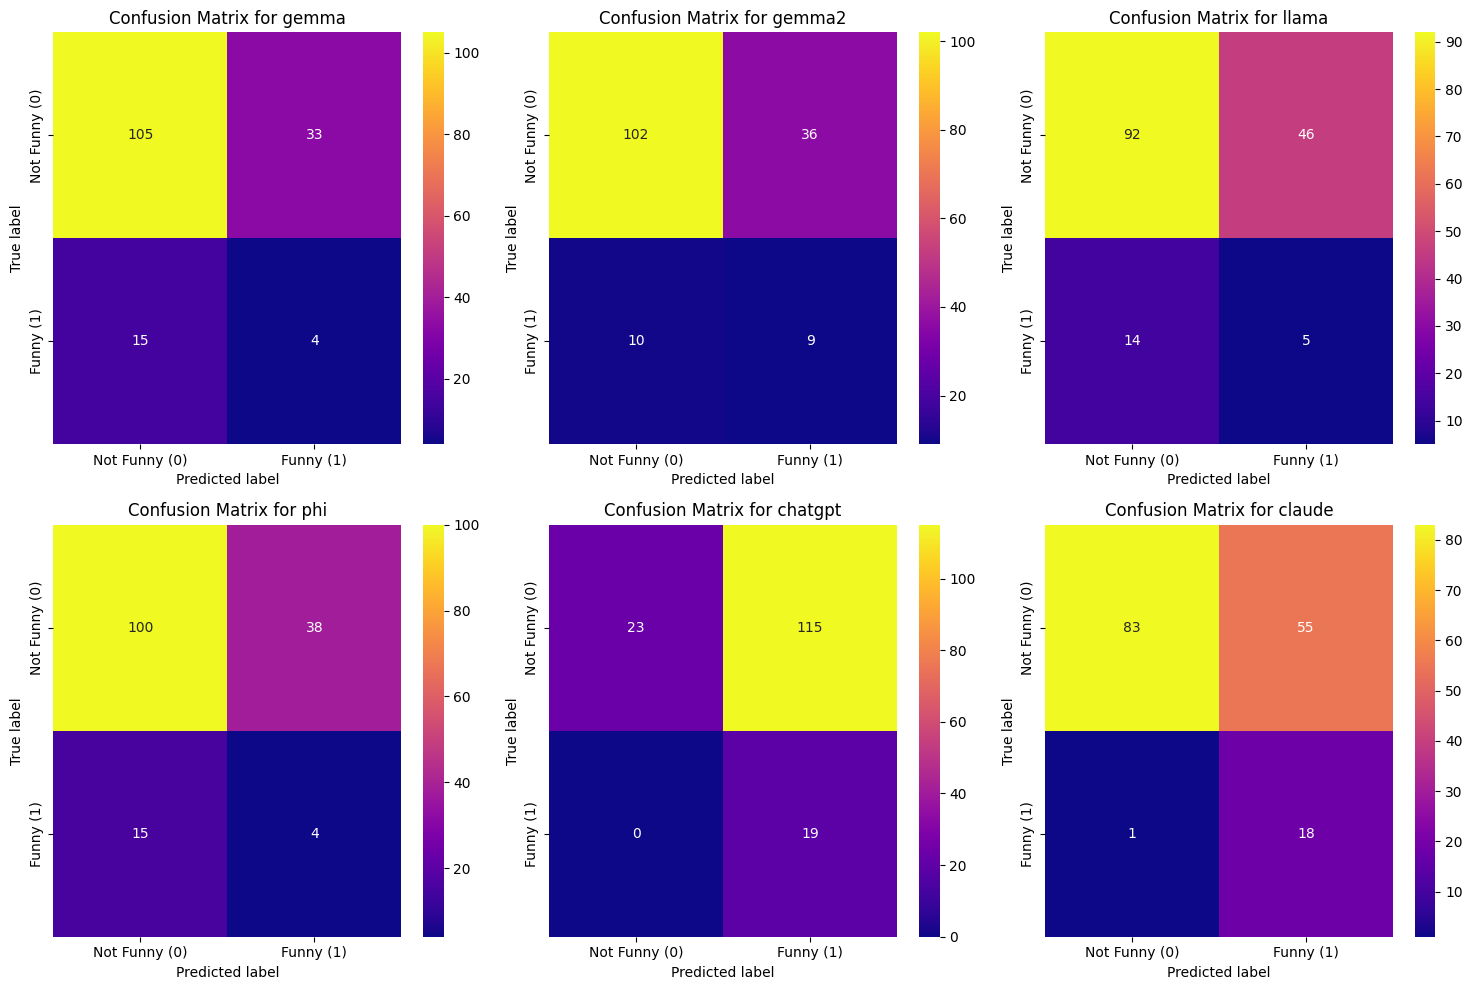

In [57]:
plt.figure(figsize=(15, 10))

for i, model in enumerate(model_names):
    cm = confusion_matrix(merged_df['human'], merged_df[model])
    
    plt.subplot(2, 3, i + 1) 
    sns.heatmap(cm, annot=True, fmt='d', cmap='plasma', 
                xticklabels=['Not Funny (0)', 'Funny (1)'], 
                yticklabels=['Not Funny (0)', 'Funny (1)'])
    
    plt.title(f'Confusion Matrix for {model}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.tight_layout()
plt.savefig("experiment_10.png", dpi=300)
plt.show()